<a href="https://colab.research.google.com/github/khamkaradinath/Predictive_maintenance_Capstone_Project-1/blob/main/Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
df=pd.read_csv("predictive_maintenance.csv")

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0


In [ ]:
df.shape

(10000, 9)

In [ ]:
#  dropping UDI and ProductID columns as they dont contribute for the analysis
df = df.drop(["UDI","Product ID"],axis = 1)

### Data Types

* Type : is a categorical column as it has 3 classes H,M,L
* Air temperature,Process temperature : has float values representing temperature in Kelvin
* Rotational speed : has number of rotations per minute in Integer datatype.
* Torque : is measured in Newton meter (Nm) of data type float.
* Tool wear : is measured in minutes of data type Integer.
* Target : is a categorical value , yet represented in Integer and later can be  imputed in this notebook.
* Failure Type : is a categorical value of type "object"

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Target,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


**Observations from above description**

* Air Temperature has a mean of 300K and 75% of data is distributed between 295.3K and 301.5K, seems like a good distribution and may not have outliers.
* Process temperature has a mean of 310K and maximum data is distributed between 305.7K and 311.1K, looks good and may not have possible outliers.
* Rotational speed has a mean 1538 and 75% of data is distribbuted between 1168 and 1612 but the maximum value is 2886 and it looks like investigation is needed to understand outliers and it will be discussed further in this notebook.
* Torque has mean 39.9 , maximum value is 76.6, minimum value is 1168 and median is 40.1 which is slightly left skewed from mean.
* Tool wear has mean 107.9 and a median(2nd quantile) of 108 which is almost a normal distribution.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


Type Column is object need to convert into int64


### Missing Values


In [ ]:
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

* There are no missing values in the data

<Axes: xlabel='Target', ylabel='count'>

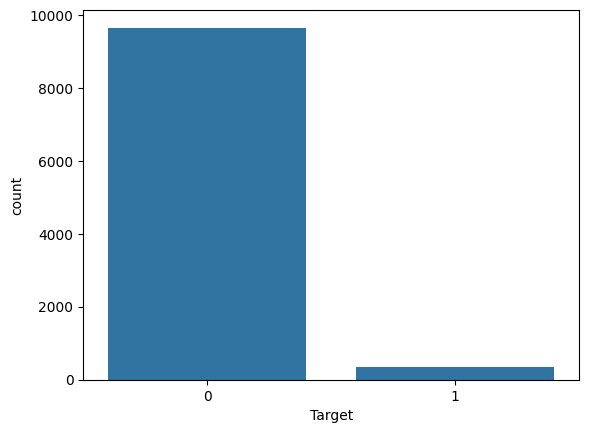

In [ ]:
sns.countplot(df,x="Target")

* Above plot show that target variable is Imbalance

<Axes: xlabel='Type', ylabel='count'>

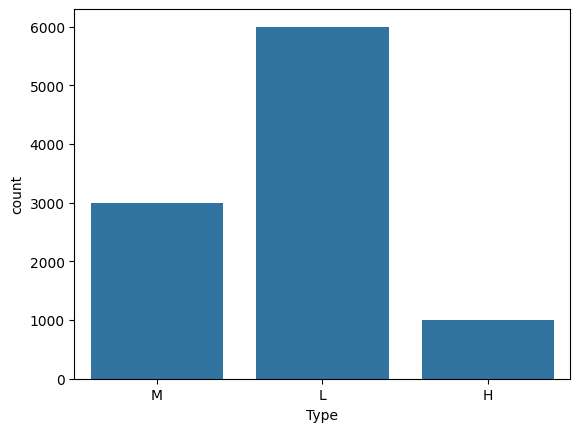

In [ ]:
sns.countplot(df,x="Type")

* Type L having More Values






#### Encoding

In [ ]:
categorical_columns = ['Type']
dummy_df = pd.get_dummies(df[categorical_columns])

df= pd.concat([df, dummy_df], axis=1)
df.drop(columns=categorical_columns ,inplace =True)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,False,False,True
1,298.2,308.7,1408,46.3,3,0,False,True,False
2,298.1,308.5,1498,49.4,5,0,False,True,False
3,298.2,308.6,1433,39.5,7,0,False,True,False
4,298.2,308.7,1408,40.0,9,0,False,True,False


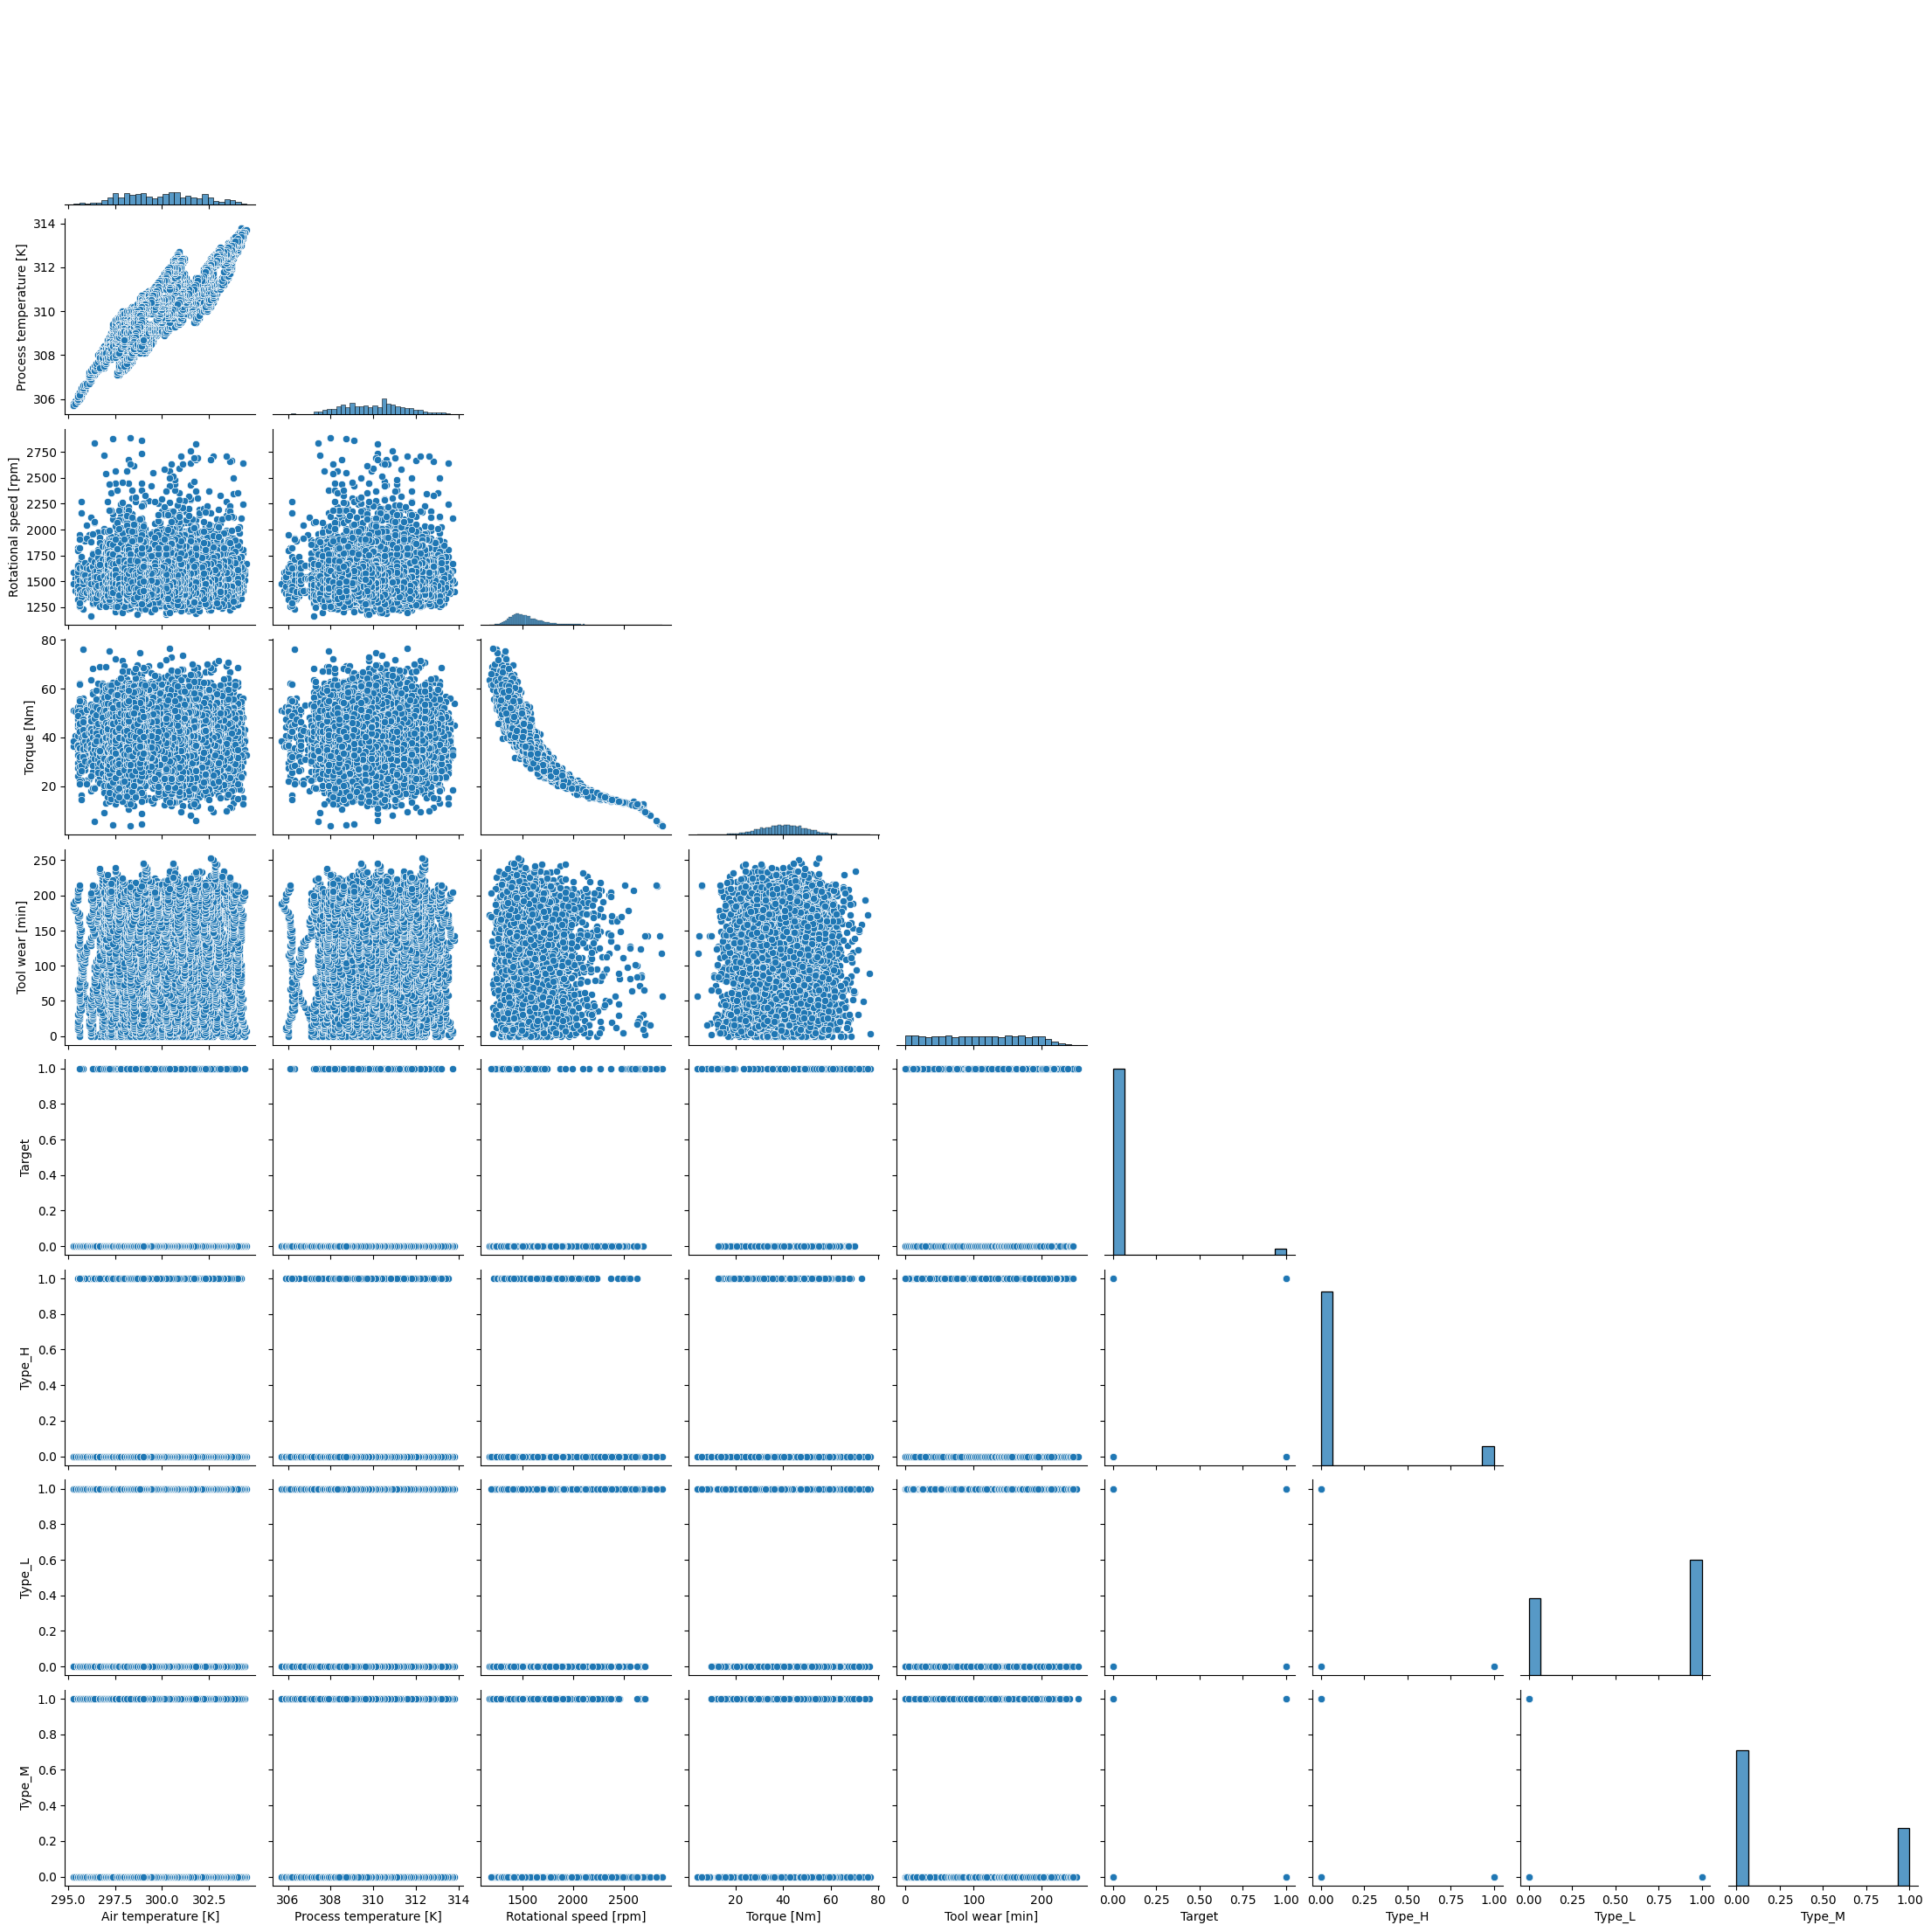

In [ ]:
sns.pairplot(df,corner=True)

* From above, Process temperature and Air temperature are positively Correlated
* Negative correlation between Torque and Rotational speed

<Axes: >

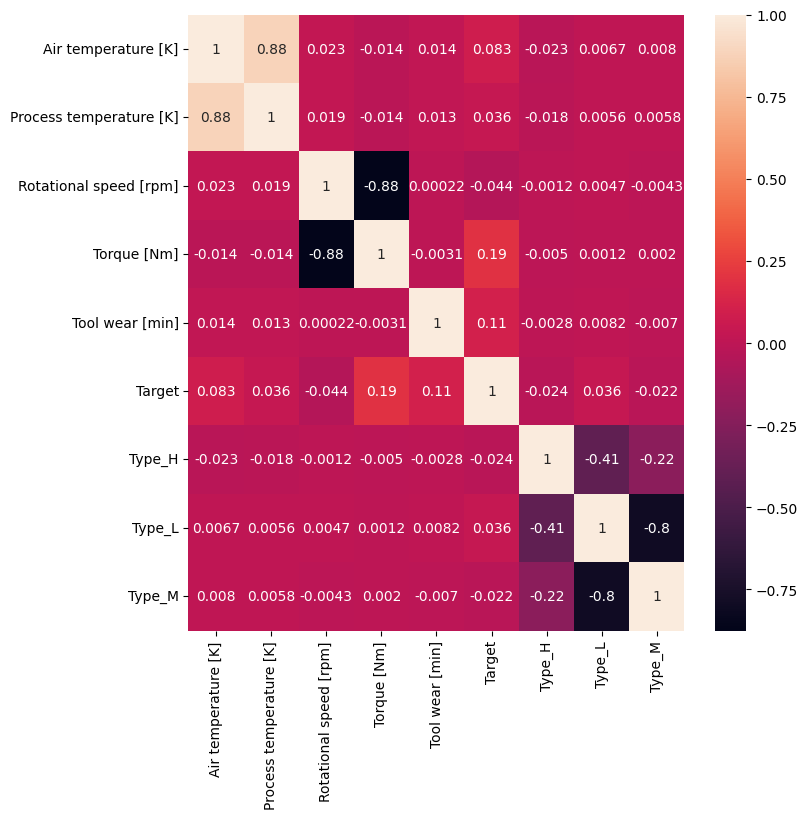

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(),annot=True)

* From above there are Strong +ve Correaltion  btn Precess temperature and Air temperature
* Strong -ve Correaltion between  Torque and Rotational speed

In [ ]:
df.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Type_H', 'Type_L', 'Type_M'],
      dtype='object')

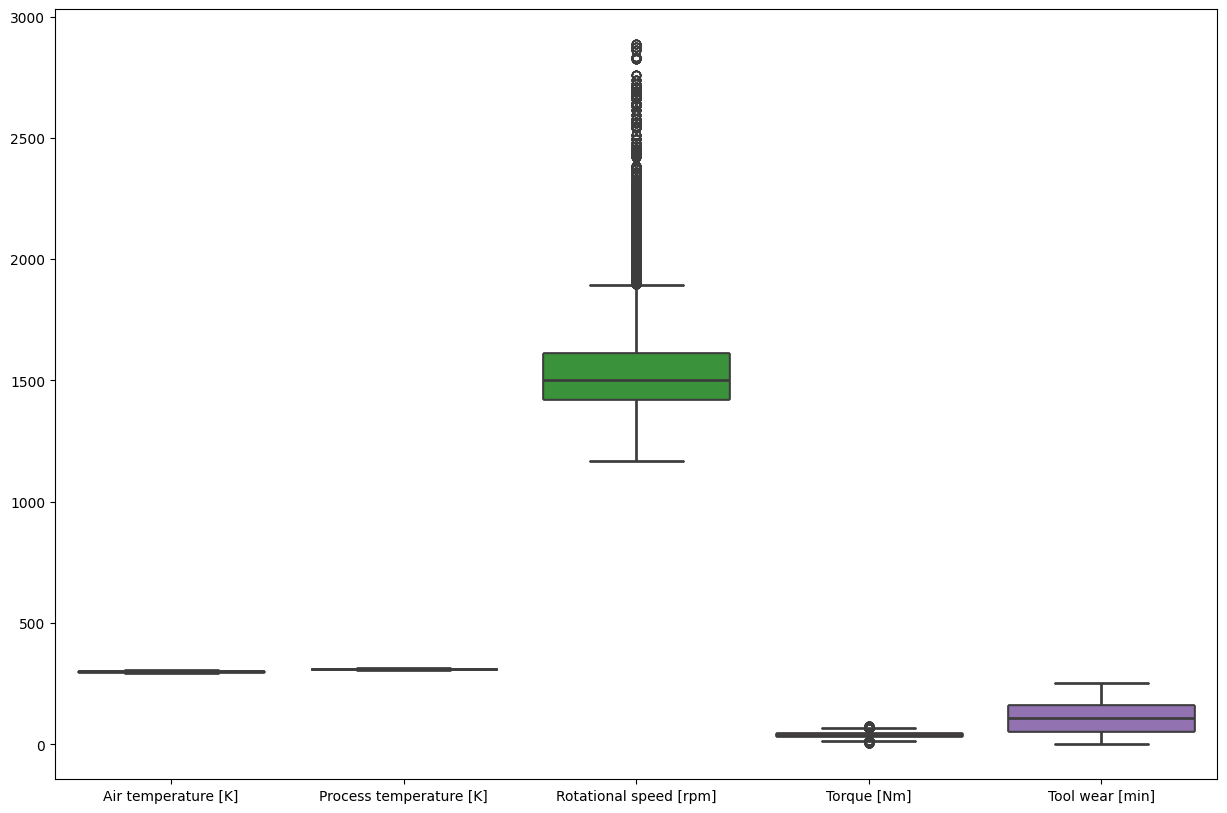

In [ ]:
plt.figure(figsize=(15,10))
for col in df.columns:
  sns.boxplot(df[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])

* there are some outlier in Data but we can handle it in Model Building
* and range is not same for every variable so MINMAX scaler is useful to convert into same range

### Splitting Data

In [ ]:
X=df.drop("Target",axis=1)
y=df["Target"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
cols=X.columns

In [ ]:
scaler=MinMaxScaler()
std=StandardScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=cols)

In [ ]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=cols)

In [ ]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [ ]:
X_train_std=pd.DataFrame(X_train_std,columns=cols)
X_test_std=pd.DataFrame(X_test_std,columns=cols)

### **Function For Model Building**

In [ ]:
def ModelBuilding(model,X_tr,y_tr,X_te,y_te):
  model.fit(X_tr,y_tr)
  y_pred=model.predict(X_te)
  print(f'Training Accuracy:{accuracy_score(y_tr,model.predict(X_tr))}')
  print(f'Testing Accuracy:{accuracy_score(y_pred,y_te)}')
  print("-----------------------------------------------------")
  print(f'Confusion Matrix:\n {confusion_matrix(y_te,y_pred)}')
  print("-----------------------------------------------------")
  print(f'Classifiction Report:\n {classification_report(y_te,y_pred)}')

### Model Building

### **1] Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR=LogisticRegression(C=0.01, solver='liblinear', random_state=0)

In [ ]:
ModelBuilding(LR,X_train,y_train,X_test,y_test)

Training Accuracy:0.9685074626865672
Testing Accuracy:0.9751515151515151
-----------------------------------------------------
Confusion Matrix:
 [[3194    5]
 [  77   24]]
-----------------------------------------------------
Classifiction Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3199
           1       0.83      0.24      0.37       101

    accuracy                           0.98      3300
   macro avg       0.90      0.62      0.68      3300
weighted avg       0.97      0.98      0.97      3300



* From Above confusion matrix we conclude that  recall for 1 is very low so its bad Model
* predicted for 0 is good but not for 1

Conclusion:
 * Logistic regression is not good for imblance dataset

**2] K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
ModelBuilding(knn,X_train,y_train,X_test,y_test)

Training Accuracy:0.9750746268656716
Testing Accuracy:0.9712121212121212
-----------------------------------------------------
Confusion Matrix:
 [[3183   16]
 [  79   22]]
-----------------------------------------------------
Classifiction Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3199
           1       0.58      0.22      0.32       101

    accuracy                           0.97      3300
   macro avg       0.78      0.61      0.65      3300
weighted avg       0.96      0.97      0.96      3300



* f1 Score is not good for 1

 ### **3] Decision Tree**

In [ ]:
# Hyperparameter Tunning
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_features': [ 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001,0.0001],
              'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12],
              'criterion' :['gini', 'entropy']
             }

DT=DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=5, verbose=True)

In [ ]:
#without Normalization and Standardazation
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.0001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['sqrt', 'log2']},
             verbose=True)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=11,
                       max_features='log2', random_state=1024)

In [ ]:
DT_bestModel=DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy',
                       max_depth=11, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=1024, splitter='best')

In [ ]:
# Without Normalization and standardization
ModelBuilding(DT_bestModel,X_train,y_train,X_test,y_test)

Training Accuracy:0.9825373134328358
Testing Accuracy:0.9775757575757575
-----------------------------------------------------
Confusion Matrix:
 [[3183   16]
 [  58   43]]
-----------------------------------------------------
Classifiction Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3199
           1       0.73      0.43      0.54       101

    accuracy                           0.98      3300
   macro avg       0.86      0.71      0.76      3300
weighted avg       0.97      0.98      0.97      3300



In [ ]:
# with Normalization
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.0001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['sqrt', 'log2']},
             verbose=True)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=11,
                       max_features='log2', random_state=1024)

In [ ]:
#with Normalization
ModelBuilding(DT_bestModel,X_train_scaled,y_train,X_test_scaled,y_test)

Training Accuracy:0.9825373134328358
Testing Accuracy:0.9775757575757575
-----------------------------------------------------
Confusion Matrix:
 [[3183   16]
 [  58   43]]
-----------------------------------------------------
Classifiction Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3199
           1       0.73      0.43      0.54       101

    accuracy                           0.98      3300
   macro avg       0.86      0.71      0.76      3300
weighted avg       0.97      0.98      0.97      3300



In [ ]:
grid_search.fit(X_train_std,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.0001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['sqrt', 'log2']},
             verbose=True)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=11,
                       max_features='log2', random_state=1024)

In [ ]:
#with Standardization
BDT=DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=11,
                       max_features='log2', random_state=1024)
ModelBuilding(BDT,X_train_std,y_train,X_test_std,y_test)

Training Accuracy:0.9825373134328358
Testing Accuracy:0.9775757575757575
-----------------------------------------------------
Confusion Matrix:
 [[3183   16]
 [  58   43]]
-----------------------------------------------------
Classifiction Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3199
           1       0.73      0.43      0.54       101

    accuracy                           0.98      3300
   macro avg       0.86      0.71      0.76      3300
weighted avg       0.97      0.98      0.97      3300



* Still we not get good result lets try Random Forest

### **4] Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(random_state=42)

In [ ]:
# Cross Validation and Grid Search
param_grid = {
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,110],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [ 8, 11, 13, 15, 17,18],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_model = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)

In [ ]:
# Without Normalization and standardization
CV_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 11, 13, 15, 17, 18],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110]})

In [ ]:
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'max_features': 'log2',
 'n_estimators': 100}

In [ ]:
rf_withoutNS=RandomForestClassifier(random_state=42,criterion='entropy',
 max_depth=17,
 max_features='log2',
 n_estimators=100)

In [ ]:
#without Standardization and Normalization
ModelBuilding(rf_withoutNS,X_train,y_train,X_test,y_test)

Training Accuracy:1.0
Testing Accuracy:0.9854545454545455
-----------------------------------------------------
Confusion Matrix:
 [[3190    9]
 [  39   62]]
-----------------------------------------------------
Classifiction Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3199
           1       0.87      0.61      0.72       101

    accuracy                           0.99      3300
   macro avg       0.93      0.81      0.86      3300
weighted avg       0.98      0.99      0.98      3300



In [ ]:
# With Normalization
CV_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 11, 13, 15, 17, 18],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110]})

In [ ]:
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'max_features': 'log2',
 'n_estimators': 100}

In [ ]:
rf_withN=RandomForestClassifier(random_state=42,criterion='entropy',
 max_depth=17,
 max_features='log2',
 n_estimators=100)

In [ ]:
ModelBuilding(rf_withN,X_train_scaled,y_train,X_test_scaled,y_test)

Training Accuracy:1.0
Testing Accuracy:0.9851515151515151
-----------------------------------------------------
Confusion Matrix:
 [[3189   10]
 [  39   62]]
-----------------------------------------------------
Classifiction Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3199
           1       0.86      0.61      0.72       101

    accuracy                           0.99      3300
   macro avg       0.92      0.81      0.85      3300
weighted avg       0.98      0.99      0.98      3300



### **5] GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()

In [ ]:
param_grid = {
    'n_estimators': [90,100,110,120,130,140],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [ 8, 11, 13, 15, 17,18]
}

In [ ]:
grid_search = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=5, verbose=True)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [8, 11, 13, 15, 17, 18],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [90, 100, 110, 120, 130, 140]},
             verbose=True)

In [ ]:
grid_search.best_params_

{'max_depth': 15, 'max_features': 'log2', 'n_estimators': 120}

In [ ]:
bestModel=GradientBoostingClassifier(max_depth= 15, max_features='log2',n_estimators=120)

In [ ]:
ModelBuilding(bestModel,X_train,y_train,X_test,y_test)

Training Accuracy:1.0
Testing Accuracy:0.9887878787878788
-----------------------------------------------------
Confusion Matrix:
 [[3193    6]
 [  31   70]]
-----------------------------------------------------
Classifiction Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3199
           1       0.92      0.69      0.79       101

    accuracy                           0.99      3300
   macro avg       0.96      0.85      0.89      3300
weighted avg       0.99      0.99      0.99      3300



In [ ]:
#with normalization
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [8, 11, 13, 15, 17, 18],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [90, 100, 110, 120, 130, 140]},
             verbose=True)

In [ ]:
grid_search.best_params_

{'max_depth': 13, 'max_features': 'log2', 'n_estimators': 120}

In [ ]:
bestModel=GradientBoostingClassifier(max_depth= 13, max_features='log2',n_estimators=120)

In [ ]:
ModelBuilding(bestModel,X_train_scaled,y_train,X_test_scaled,y_test)

Training Accuracy:1.0
Testing Accuracy:0.9881818181818182
-----------------------------------------------------
Confusion Matrix:
 [[3193    6]
 [  33   68]]
-----------------------------------------------------
Classifiction Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3199
           1       0.92      0.67      0.78       101

    accuracy                           0.99      3300
   macro avg       0.95      0.84      0.89      3300
weighted avg       0.99      0.99      0.99      3300



Gradient Boosting Classifier is good one for Imblance Dataset and f1 Score is 99 percentage